### Airbnb Listing EDA
    Author      :   Mareez Adel
    Date        :   4 June,2024
    Project     :   Airbnb Listing Exploratory Data Analysis
This project conducts an EDA of Airbnb listings in a selected city to analyze factors like pricing, availability, location, and property type, aiming to provide stakeholders with insights for informed decision-making.

Key Features:
- Data Reading
- Data Pre-processing

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Data

In [2]:
df = pd.read_csv('listings.csv')

### Data Manipulation

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

#### Feature Selection

In [4]:
df = df[['id' , 'name' , 'host_id' , 'host_name' , 'host_response_time' ,
         'host_response_rate' , 'host_acceptance_rate' , 'host_is_superhost' , 'host_listings_count' ,
         'host_identity_verified' , 'neighbourhood_cleansed' , 'latitude' , 'longitude' , 'property_type' ,
         'room_type' , 'accommodates' , 'bathrooms' , 'bedrooms' , 'beds' , 'price' , 'minimum_nights' ,
         'maximum_nights' , 'has_availability' , 'availability_365' , 'number_of_reviews' , 'review_scores_rating' ,
         'review_scores_accuracy' , 'review_scores_cleanliness' , 'review_scores_checkin' , 'review_scores_communication' ,
         'review_scores_location' , 'review_scores_value' , 'instant_bookable' , 'reviews_per_month']]

#### Convert Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4261 non-null   int64  
 1   name                         4261 non-null   object 
 2   host_id                      4261 non-null   int64  
 3   host_name                    4261 non-null   object 
 4   host_response_time           3733 non-null   object 
 5   host_response_rate           3733 non-null   object 
 6   host_acceptance_rate         3805 non-null   object 
 7   host_is_superhost            4207 non-null   object 
 8   host_listings_count          4261 non-null   int64  
 9   host_identity_verified       4261 non-null   object 
 10  neighbourhood_cleansed       4261 non-null   object 
 11  latitude                     4261 non-null   float64
 12  longitude                    4261 non-null   float64
 13  property_type     

In [6]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False})
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})

#### Handle Missing Values

In [7]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
host_response_time,528
host_response_rate,528
host_acceptance_rate,456
host_is_superhost,54
host_listings_count,0
host_identity_verified,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4261 non-null   int64  
 1   name                         4261 non-null   object 
 2   host_id                      4261 non-null   int64  
 3   host_name                    4261 non-null   object 
 4   host_response_time           3733 non-null   object 
 5   host_response_rate           3733 non-null   float64
 6   host_acceptance_rate         3805 non-null   float64
 7   host_is_superhost            4207 non-null   object 
 8   host_listings_count          4261 non-null   int64  
 9   host_identity_verified       4261 non-null   bool   
 10  neighbourhood_cleansed       4261 non-null   object 
 11  latitude                     4261 non-null   float64
 12  longitude                    4261 non-null   float64
 13  property_type     

In [9]:
numerical_cols = [
                    'host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms',
                    'beds', 'price', 'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month'
                ]

In [10]:
categorical_cols =  [
                    'host_response_time', 'host_is_superhost', 'neighbourhood_cleansed',
                    'property_type', 'room_type', 'has_availability'
                    ]

In [11]:
# Fill missing values for numerical columns with median
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Fill missing values for categorical columns with mode
for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

In [13]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_listings_count,0
host_identity_verified,0


#### Check For Outliers

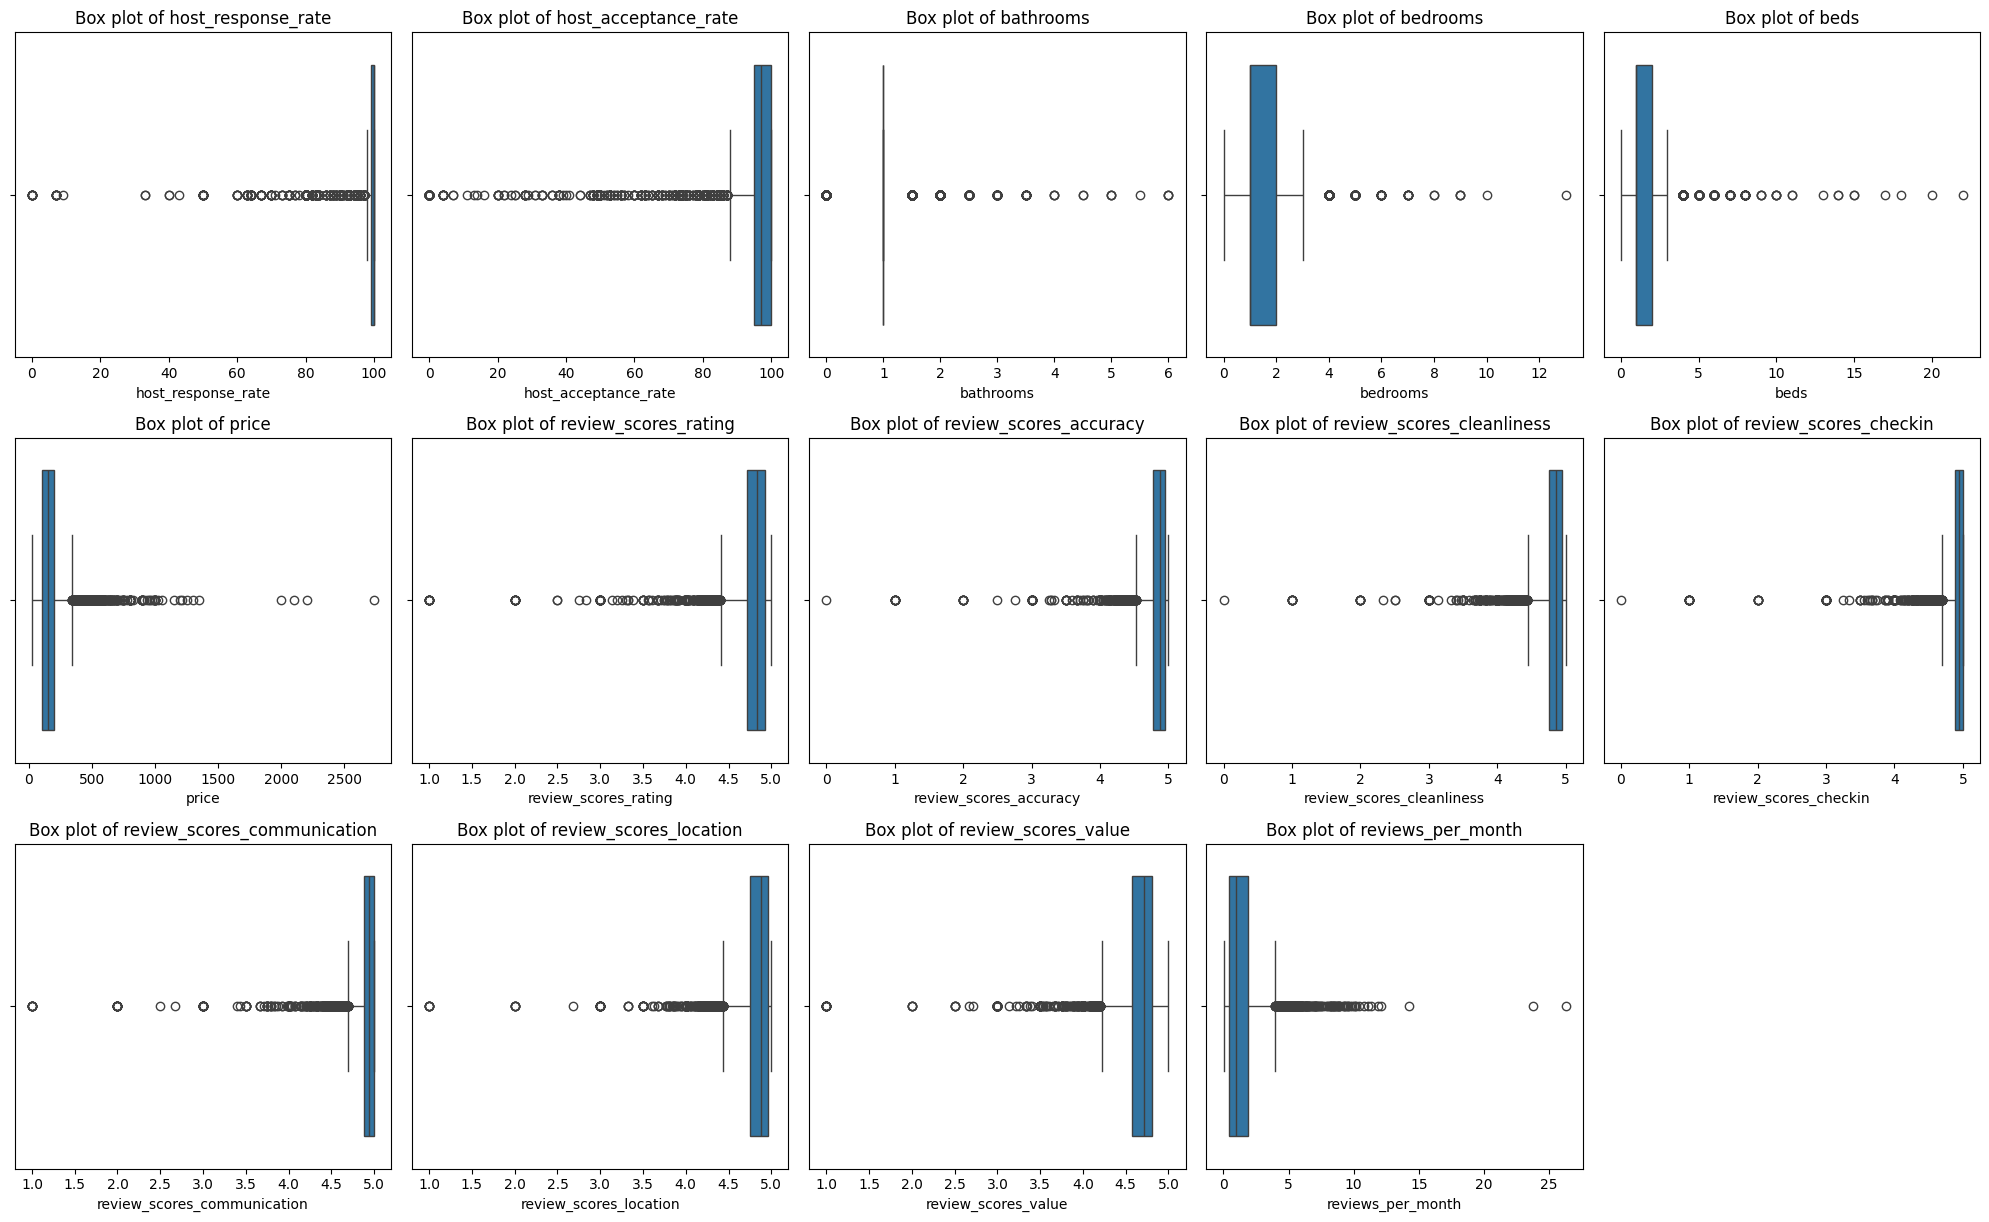

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

axes = axes.flatten()

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=df[column] , ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')

for j in range(i + 1 , len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Remove Outliers

In [15]:
outlier_columns = [
                    'price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'bedrooms', 'bathrooms', 'beds', 'reviews_per_month'
                  ]

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df, outlier_columns)

print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

Original dataframe shape: (4261, 34)
Cleaned dataframe shape: (1508, 34)


#### Feature Engineering

In [16]:
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

df_cleaned['average_review_score'] = df_cleaned[review_score_columns].mean(axis=1)
print(df_cleaned[['average_review_score']])

df_cleaned = df_cleaned.drop(columns= review_score_columns)

      average_review_score
0                 4.942857
1                 4.815714
3                 4.760000
4                 4.942857
7                 4.947143
...                    ...
4253              4.862857
4254              4.862857
4255              4.862857
4256              4.862857
4257              4.862857

[1508 rows x 1 columns]


### Correlation Heatmap

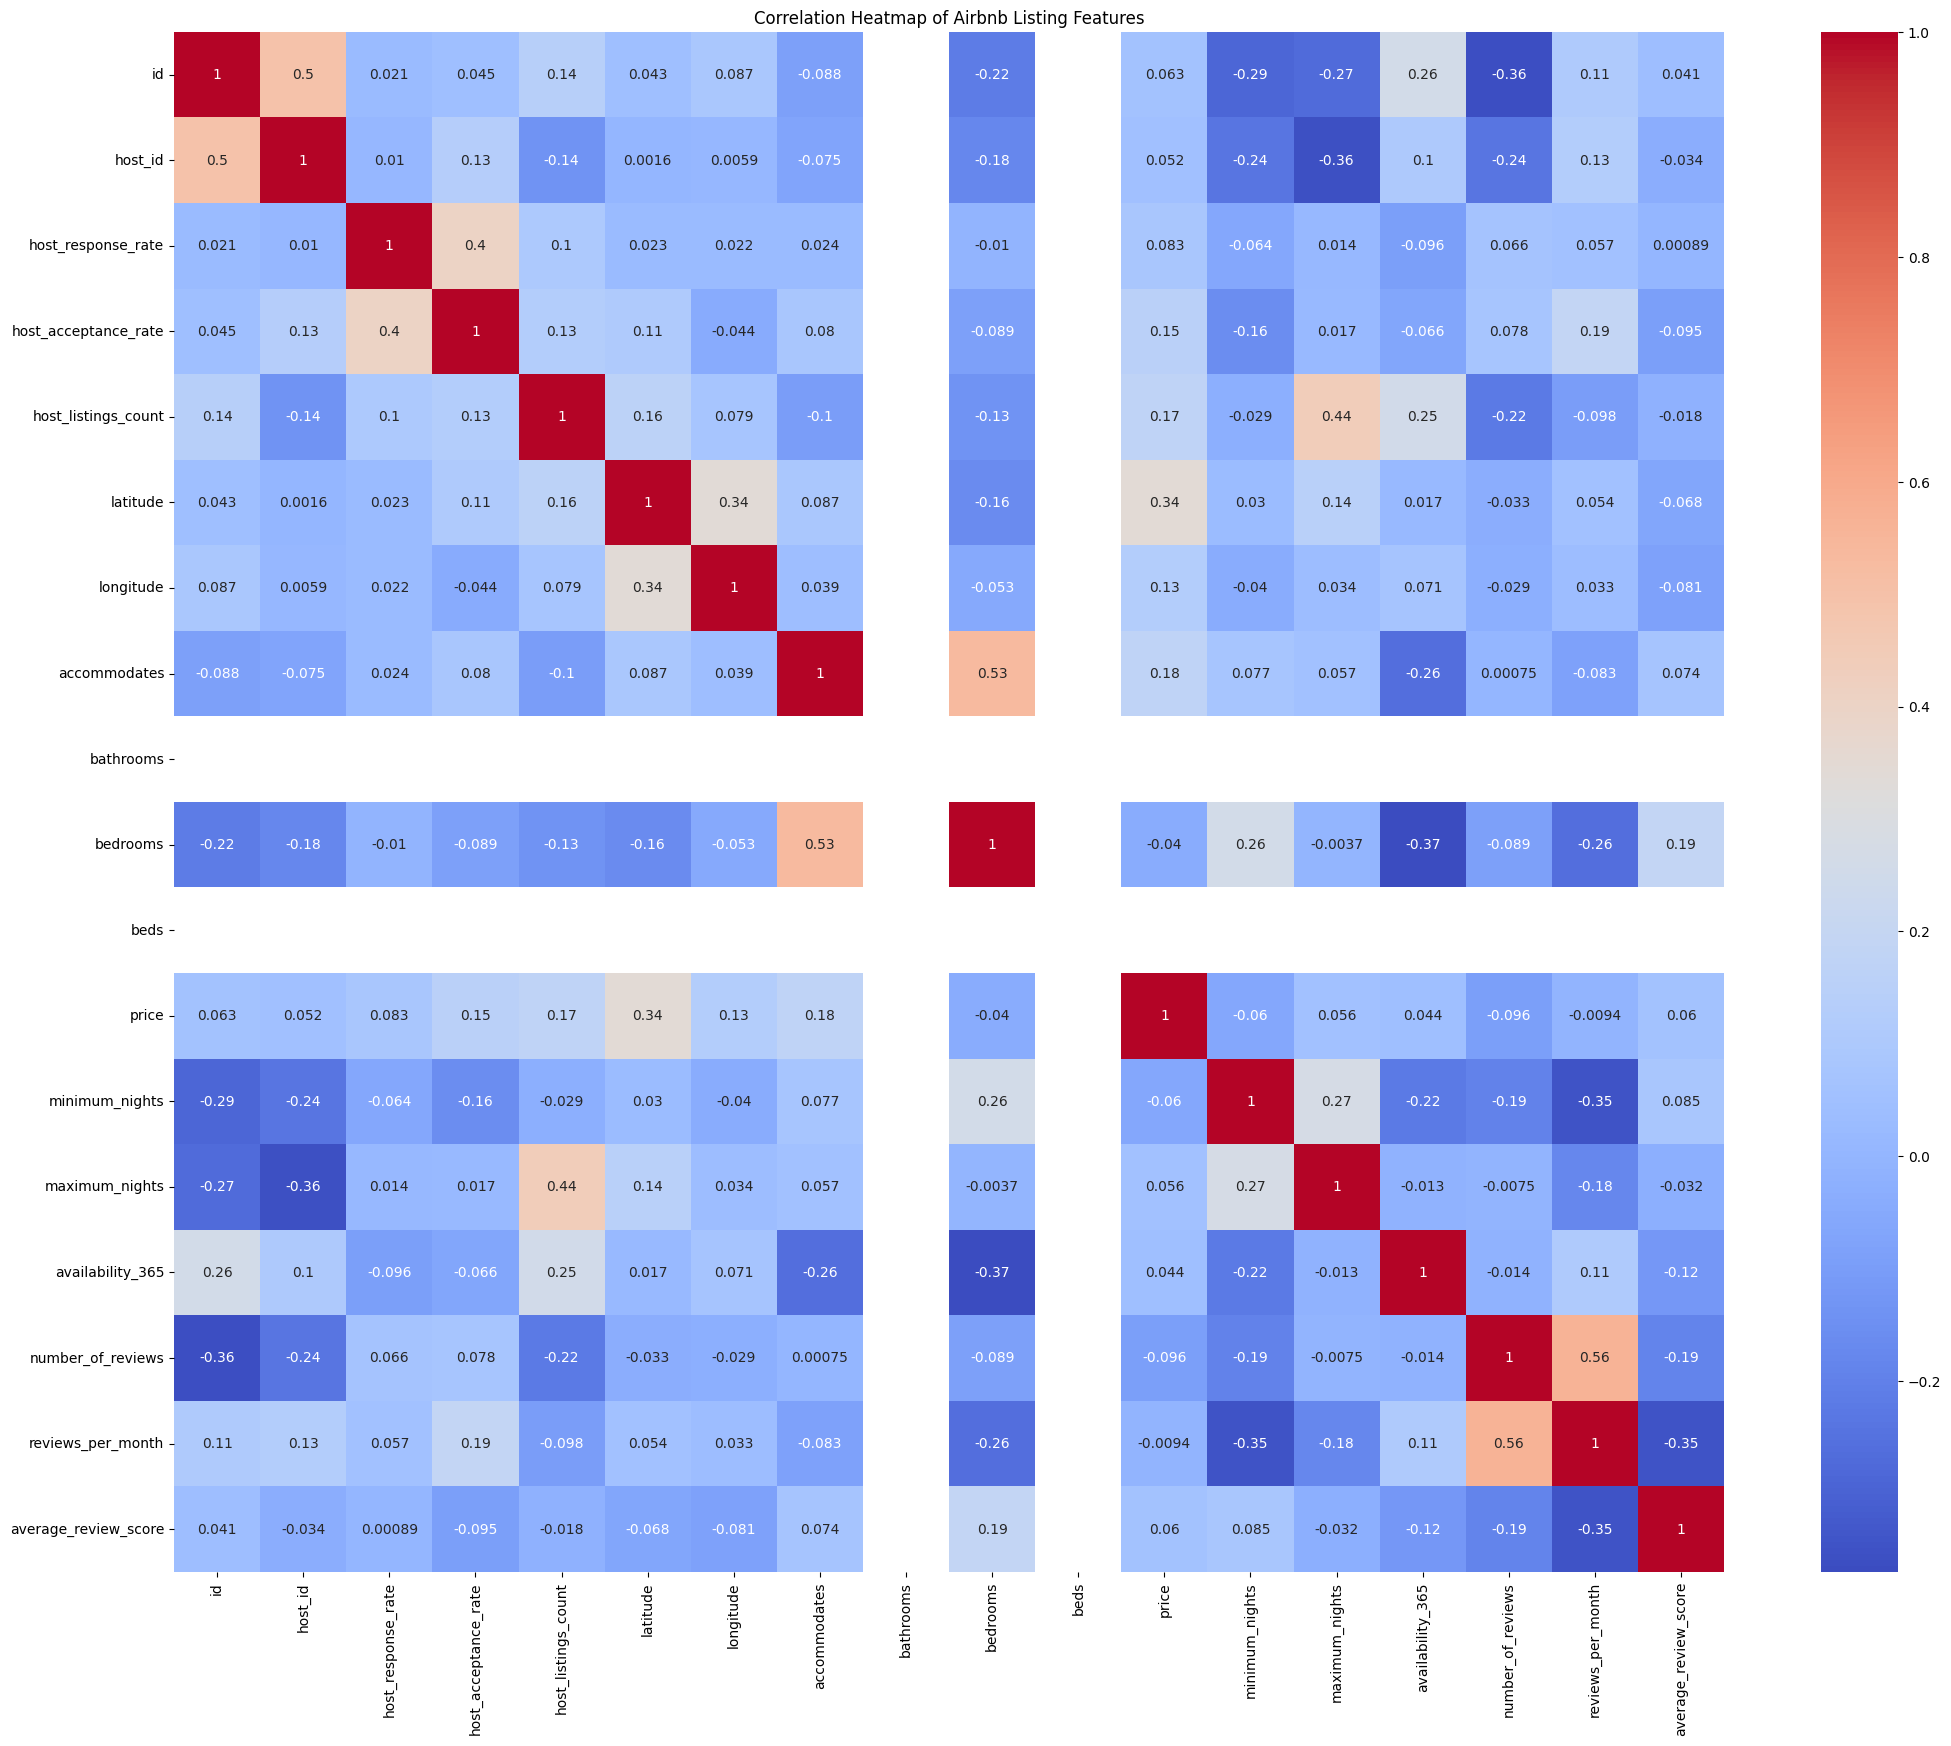

In [17]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Plotting the heatmap
plt.figure(figsize=(25,20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Airbnb Listing Features')
plt.show()

- **accommodates vs bedrooms:** strong positive correlation (0.53), more bedrooms generally allow for more guests
- **price vs accommodates:** moderate positive correlation (0.34), Listings that accommodate more guests tend to be more expensive.
- **price vs bedrooms:** weak positive correlation (0.18), more bedrooms might lead to higher prices but not necessarily.
- **reviews_per_month vs availability_365:** moderate positive correlation (0.27), Listings that are more frequently available tend to get more reviews monthly.

### Plots

#### Plot 1: Price Distribution by Neighborhood

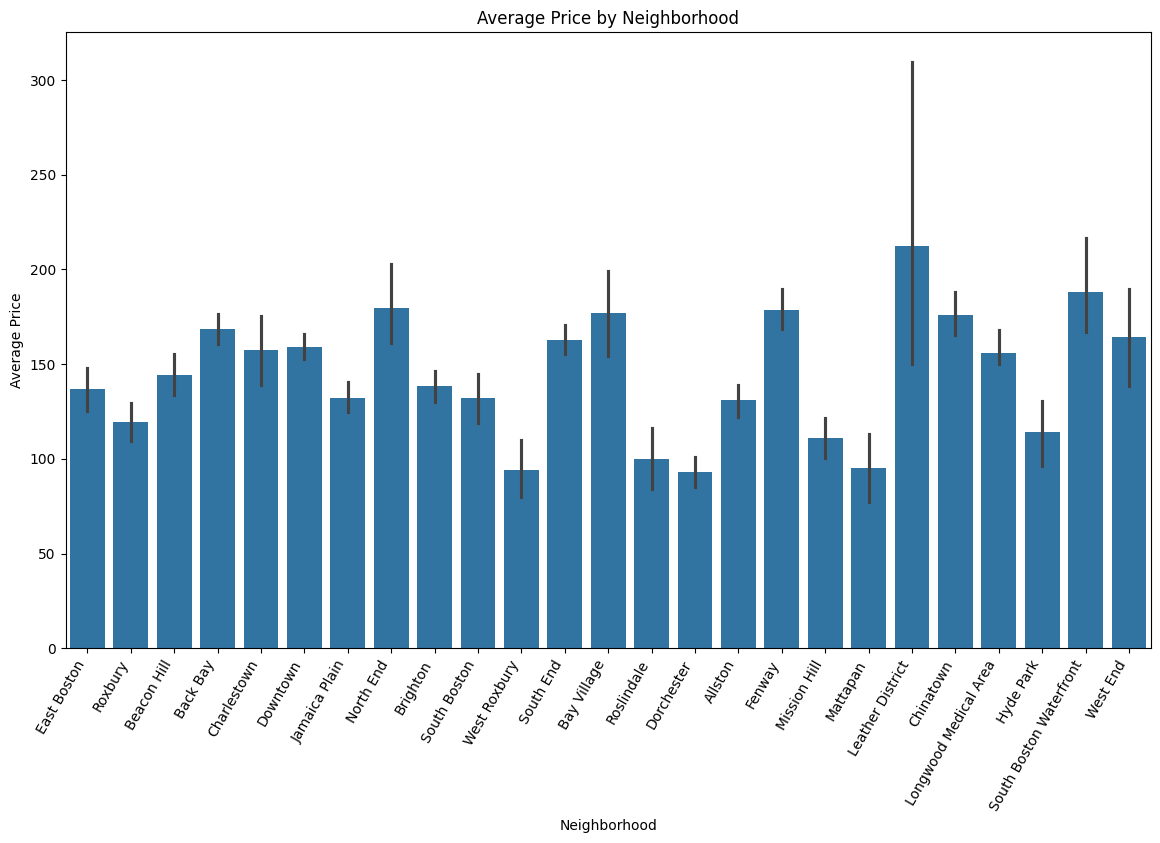

In [18]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned, x='neighbourhood_cleansed', y='price', estimator=np.mean)
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=60, ha='right')
plt.show()

- This plot helps identify neighborhoods with stable pricing and those with greater variability, aiding in strategic decision-making for property management and pricing.

#### Plot 2: Impact of Location on Pricing

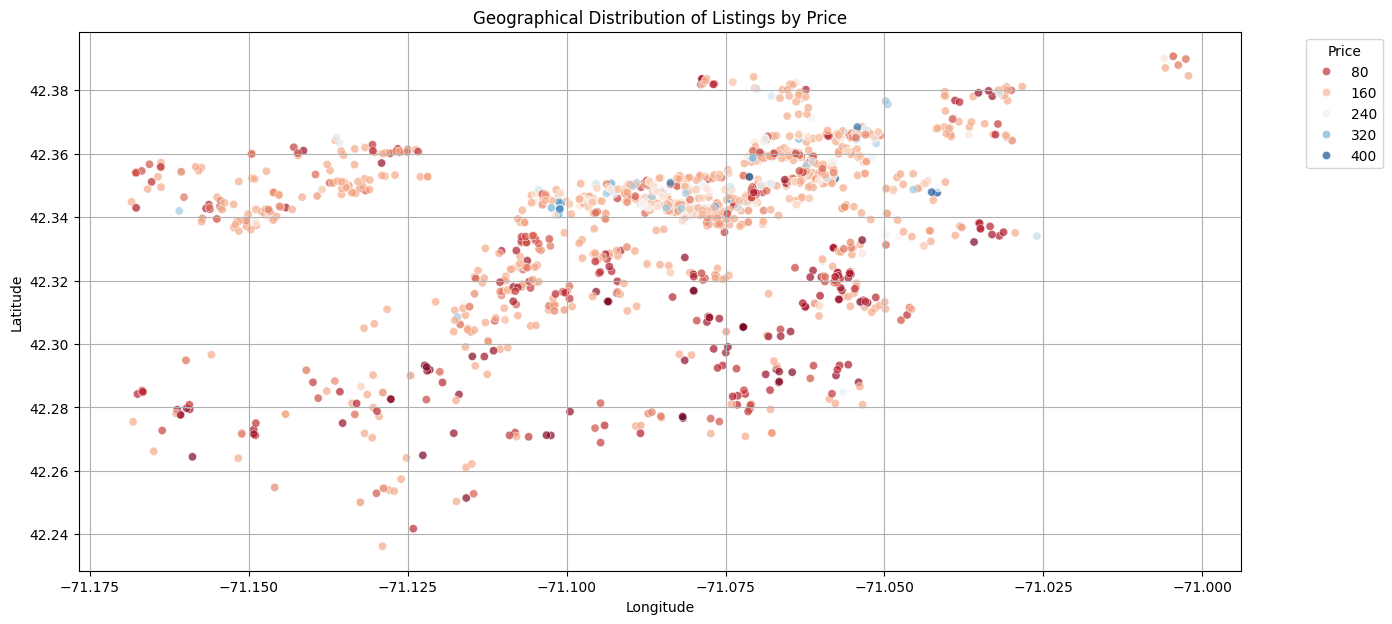

In [19]:
plt.figure(figsize=(15, 7))
scatter_plot = sns.scatterplot(
    x=df_cleaned['longitude'],
    y=df_cleaned['latitude'],
    hue=df_cleaned['price'],
    palette='RdBu',
    alpha=0.7
)
plt.title('Geographical Distribution of Listings by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


- This plot helps shows that most listings are concentrated in specific neighborhoods and also that prices vary within the same area, indicating a mix of property types.

#### Plot 3: Distribution of Prices Across Different Room Types

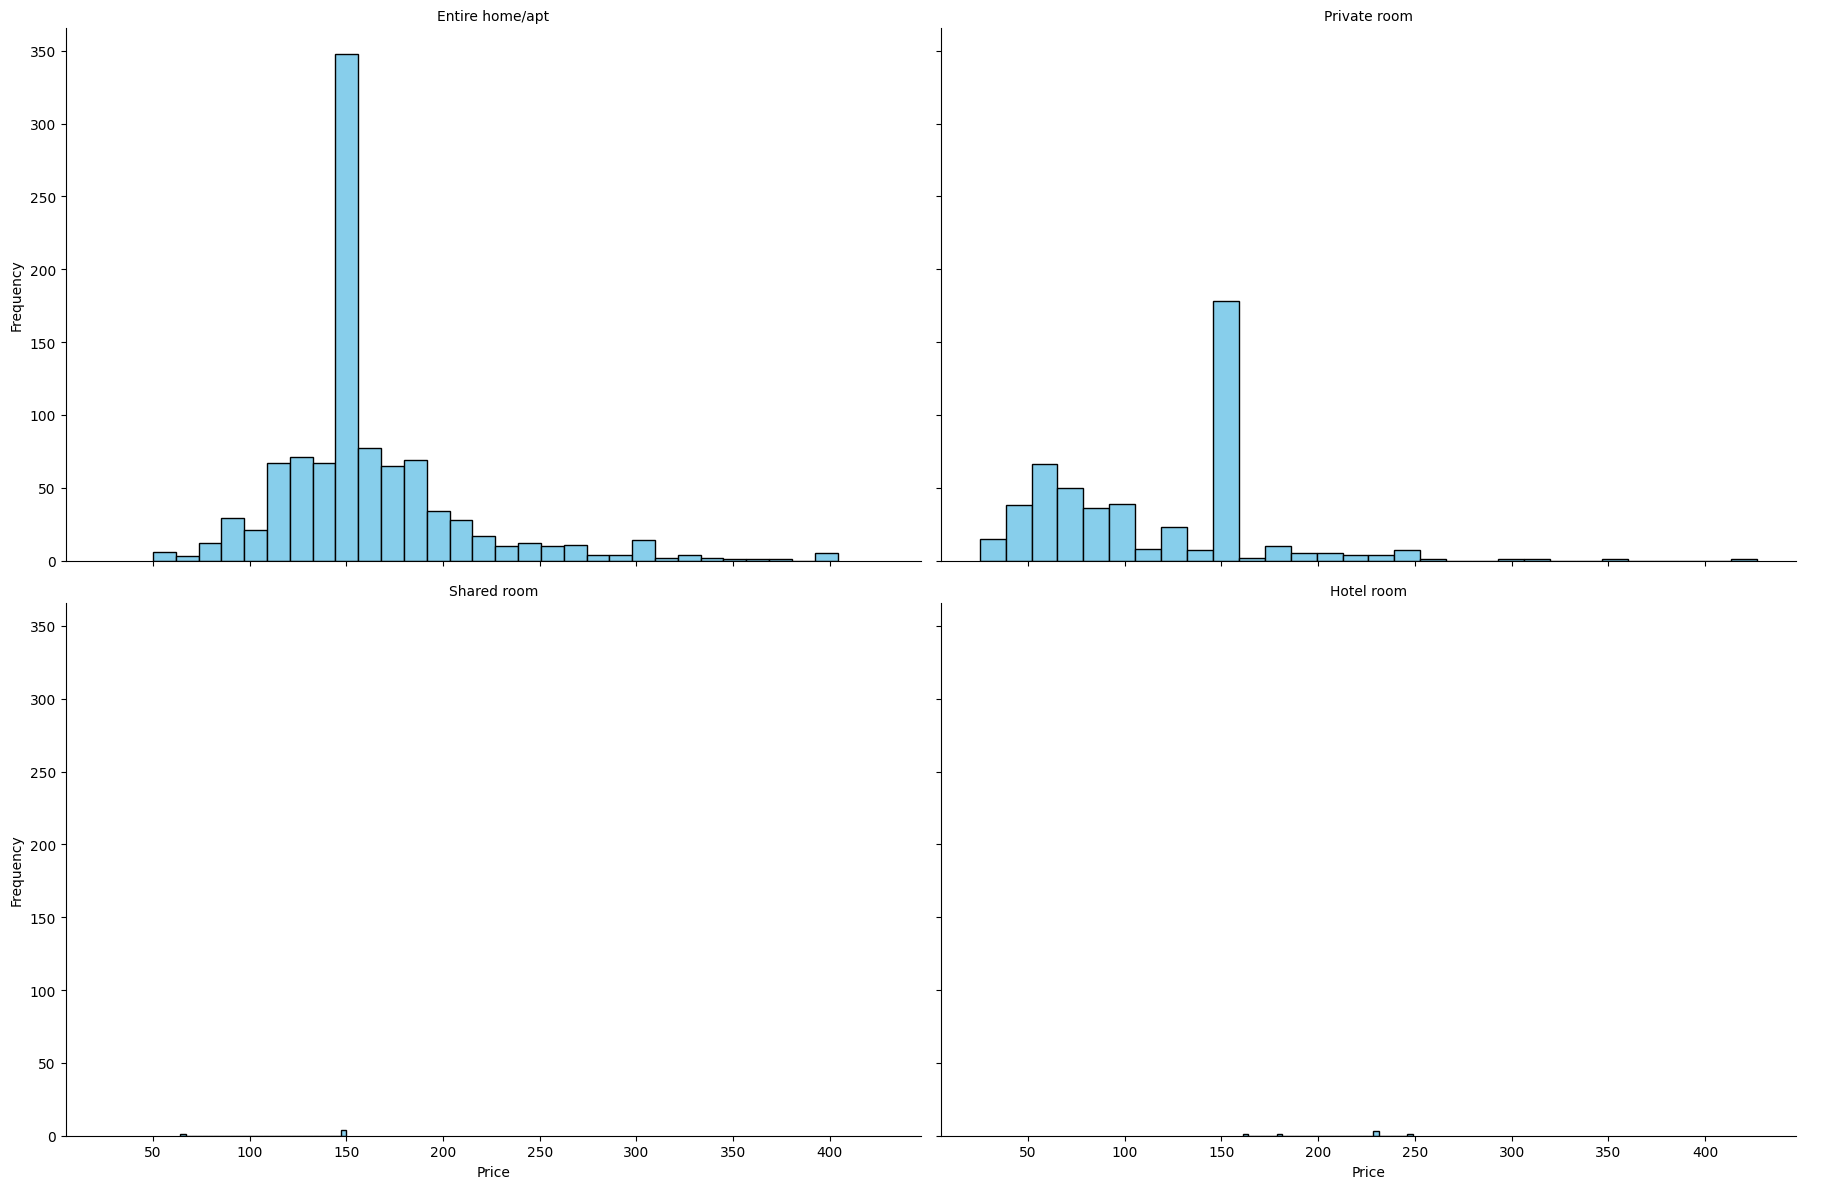

In [20]:
g = sns.FacetGrid(df_cleaned, col='room_type', col_wrap=2, height=6, aspect=1.5)
g.map(plt.hist, 'price', bins=30, color='skyblue', edgecolor='black')
g.add_legend()
g.set_axis_labels('Price', 'Frequency')
g.set_titles(col_template="{col_name}")
plt.show()

- This plot helps show the price distribution patterns for different room types. It highlights how entire homes/apartments and private rooms have a wider range of prices, while shared rooms and hotel rooms are more concentrated at lower price points. This distinction reflects varying market segments and pricing strategies across room types.

#### Plot 4: Availability Over Time

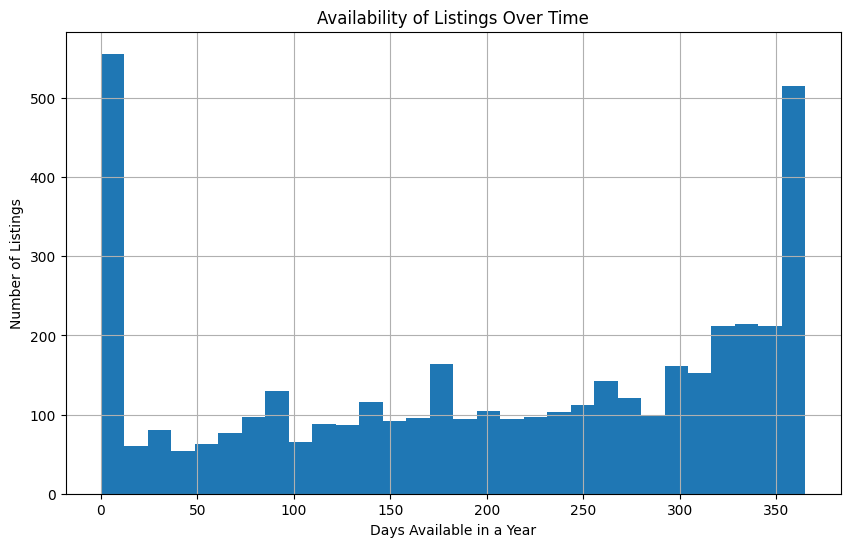

In [29]:
plt.figure(figsize=(10, 6))
df['availability_365'].hist(bins=30)
plt.title('Availability of Listings Over Time')
plt.xlabel('Days Available in a Year')
plt.ylabel('Number of Listings')
plt.show()

- This plot highlights the distribution of Airbnb listings with peaks at zero and full availability, providing insights into market segmentation between full-time and part-time rentals.



#### Plot 5: Host Response Time and Price

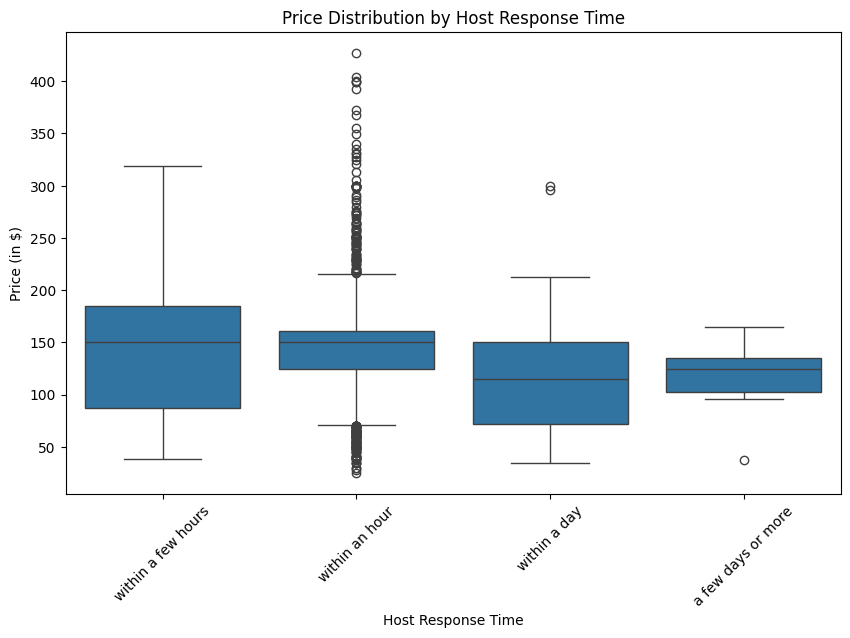

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_response_time', y='price', data=df_cleaned)
plt.title('Price Distribution by Host Response Time')
plt.ylabel('Price (in $)')
plt.xlabel('Host Response Time')
plt.xticks(rotation=45)
plt.show()


- This plot shows that faster host response times generally correspond to higher listing prices, with significant variability and outliers for those responding within an hour.

#### Plot 6: Superhost vs. Non-Superhost Comparison

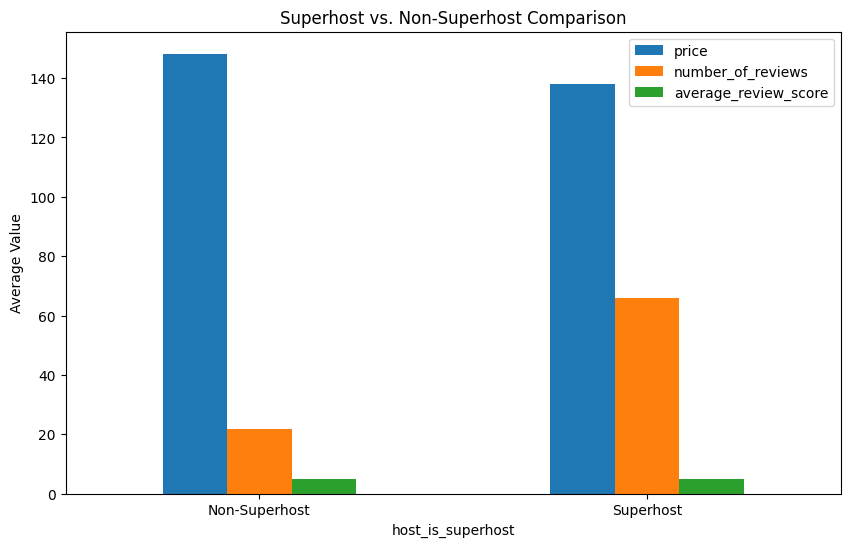

In [33]:
superhost_comparison = df_cleaned.groupby('host_is_superhost').agg({
    'price': 'mean',
    'number_of_reviews': 'mean',
    'average_review_score': 'mean'
}).reset_index()

superhost_comparison['host_is_superhost'] = superhost_comparison['host_is_superhost'].map({True: 'Superhost', False: 'Non-Superhost'})

superhost_comparison.set_index('host_is_superhost', inplace=True)
superhost_comparison.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Superhost vs. Non-Superhost Comparison')
plt.ylabel('Average Value')
plt.show()


- This plot highlights that while Superhosts tend to receive more reviews, they generally charge slightly lower prices, with average review scores remaining similar between Superhosts and Non-Superhosts.

### Conclusion:

1. Price Variation: Higher prices are concentrated in central neighborhoods, while outlying areas are more affordable.
2. Geographical Distribution: Premium listings cluster in central, desirable locations.
3. Room Type: Entire homes dominate, with prices mostly between 100 - 150 dollars
4. Availability: Listings are either almost always available or rarely so, indicating varied rental strategies.
5. Host Response Time: Faster response times are associated with higher prices.
6. Superhosts: Superhosts have lower prices but significantly more reviews, indicating better value and service.

### Recommendations:

1. Create marketing campaigns highlighting the unique attractions or benefits of less popular neighborhoods to drive demand and bookings.
2. Develop incentive programs for hosts who consistently receive high ratings, maintain high availability, or improve their response times. This can motivate hosts to enhance their service quality.
3. Offer packages or promotions for budget-conscious travelers in more affordable neighborhoods, focusing on experiences that provide value without compromising on quality.
4. Provide hosts with more detailed analytics on their performance relative to competitors, helping them make informed decisions on pricing, availability, and service improvements.
5. Implement dynamic pricing based on demand and location.
6. Offer premium services in high-price areas; highlight unique features in lower-price areas.